> ***Date:*** 27th of January, 2024

> # TELCO DATA ANALYSIS

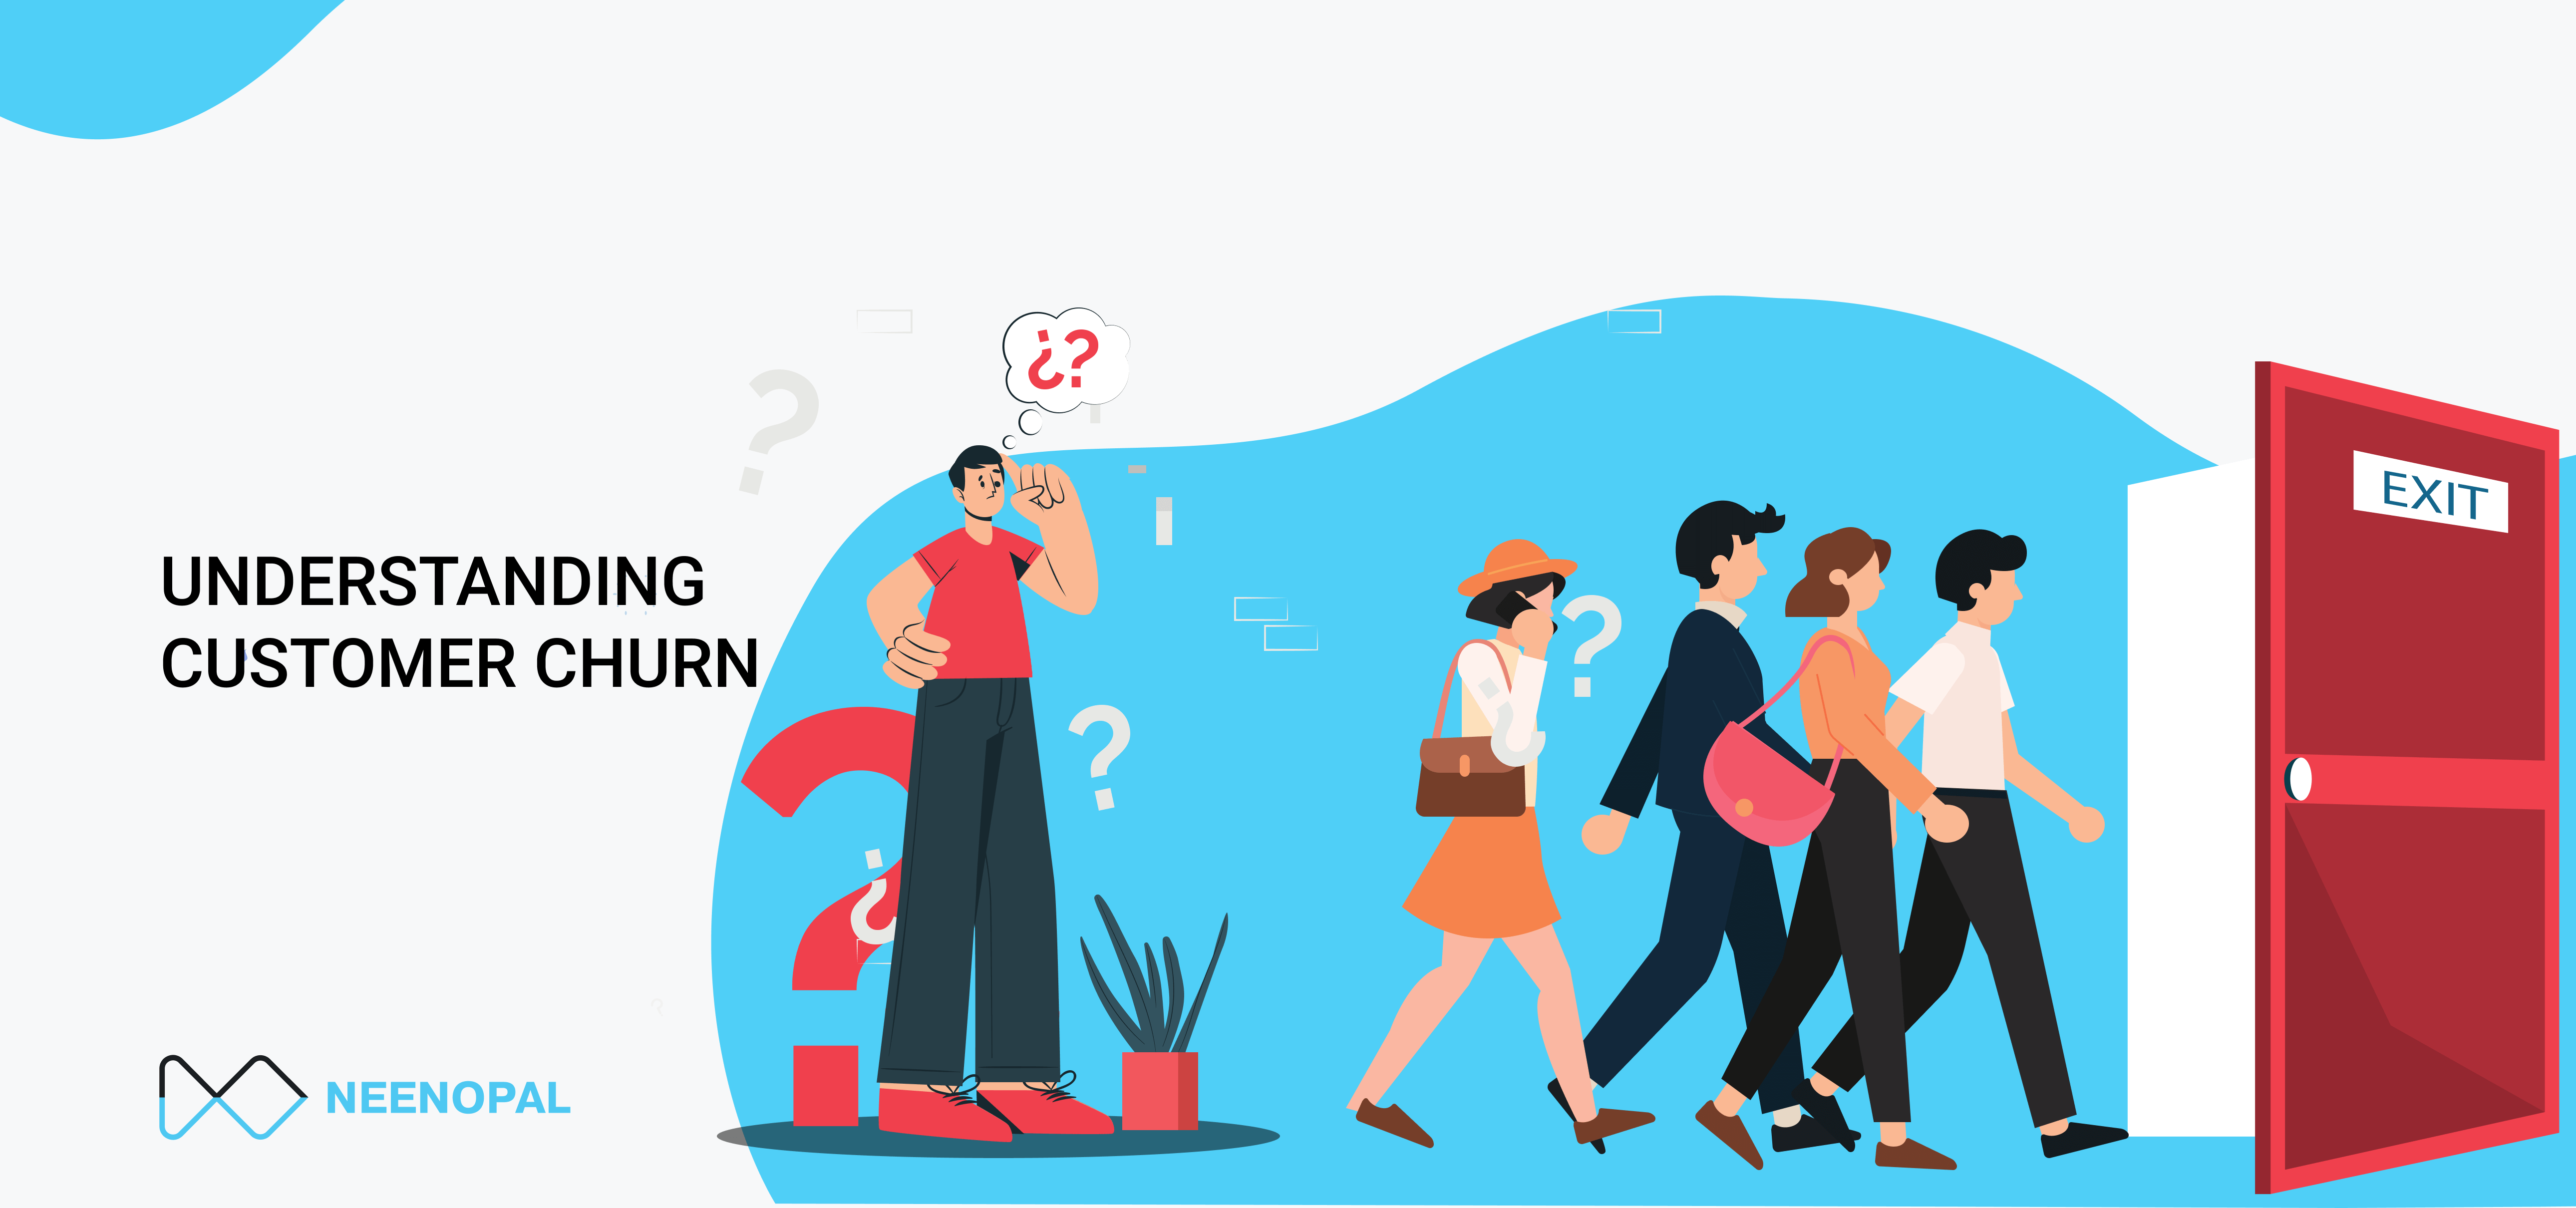

***Introduction***
This is a Telecommunication company which provides some services to its customers, some customers have left, and we are here to analyze the case and figure out the reasons behind thier churn using the provided features.

> # Dataset Description

***Churn:*** customers who left within the last month. 

***Services that each customer has signed up for:***  Phone, Multiple lines, Internet, Online security, Online backup, Device protection, Tech support, and Streaming TV and movies.

***Customer account information:*** how long they’ve been a customer, Contract, Payment method, Paperless billing, Monthly charges, and Total charges.

***Demographic info about customers:*** Gender, Age range, and if they have Partners and Dependents.



> # Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> # Reading the dataset

In [ ]:
# Reads the csv file and stores the content.
df = pd.read_csv("Telco-Customer-Churn.csv")

# Displays the content of the data frame
df

> # Data Exploration


In [ ]:
# To determine the number of rows and column
df.shape

In [ ]:
# To preview the first five column of the dataset
df.head()

In [ ]:
# To retrieve the column labels (column names)
df.columns

In [ ]:
# To list all the columns, non null count and data type.
df.info()

In [ ]:
# To generate descriptive statistics 
df.describe()

In [ ]:
# To display the data types of each column
df.dtypes

In [ ]:
# To retrieve a random sample of rows
df.sample()

In [ ]:
# To get the unique values present in the "customerID" column
df["customerID"].unique()

In [ ]:
# To get the unique values present in the "gender" column
df["gender"].unique()

In [ ]:
# To get the unique values present in the "SeniorCitizen" column
df["SeniorCitizen"].unique()

In [ ]:
# To get the unique values present in the "Partner" column
df["Partner"] .unique()

In [ ]:

# To get the unique values present in the "Dependents" column
df["Dependents"].unique()

In [ ]:
# To get the unique values present in the "tenure" column
df["tenure"].unique()

In [ ]:
# To get the unique values present in the "PhoneService" column
df["PhoneService"].unique()

In [18]:
# To get the unique values present in the "PhoneService" column
df["PhoneService"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# To get the unique values present in the "MultipleLines" column
df["MultipleLines"].unique()

In [ ]:
# To get the unique values present in the "InternetService" column
df["InternetService"].unique()

In [ ]:
# To get the unique values present in the "OnlineSecurity" column
df["OnlineSecurity"].unique()

In [ ]:
# To get the unique values present in the "OnlineBackup" column
df["OnlineBackup"].unique()

In [ ]:
# To get the unique values present in the "DeviceProtection" column
df["DeviceProtection"].unique()

In [ ]:
# To get the unique values present in the "TechSupport" column
df["TechSupport"].unique()

In [25]:
df["TechSupport"] = "No internet service"

In [ ]:
# To get the unique values present in the "TotalCharges" column
df["TotalCharges"].unique()

> # Data Cleaning:

In [ ]:
# To determine the sum of the null values
df.isnull().sum()

In [ ]:
# To determine the sum of the duplicate values
df.duplicated().sum()

***Replace 1 with Yes and 0 with No in the senior citizen column***

In [31]:
df["SeniorCitizen"] = df["SeniorCitizen"].replace(1,"yes")
df["SeniorCitizen"] = df["SeniorCitizen"].replace(0,"no")


In [ ]:
df["SeniorCitizen"].unique()

0 ==> Not a senior citizen
1 ==> is a senior citizen

In [ ]:
df["TotalCharges"].dtypes

***Correct the data type of "TotalCharges" from Object to Float.***

In [68]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [76]:
df["TotalCharges"].dtypes

dtype('float64')

In [36]:
df["TotalCharges"].isnull().sum()

11

There are 11 missing values, this is so small ratio to the data size, so dropping them will not affect the data analysis.

In [37]:
# Removed Null Values from TotalCharges column
df.dropna(subset=["TotalCharges"], inplace=True)

In [ ]:
df["TotalCharges"].isnull().sum()

> # Explratory Data Anlysis:

**1. What is the overall churn rate in the company?** 

In [ ]:
df["Churn"].unique()

In [ ]:
# Count of each unique values in the "Churn" column 
churn_rate = df["Churn"].value_counts()
churn_rate

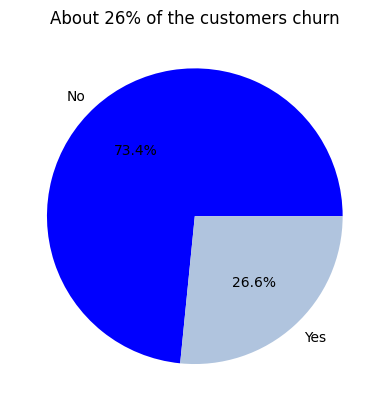

In [42]:
churn_rate = df["Churn"].value_counts()
plt.pie(churn_rate.values, labels= churn_rate.index, colors = ["blue", "lightsteelblue"], autopct="%1.1f%%")
plt.title("About 26% of the customers churn")
plt.show()

**Insight:** About a quarter of the customers left last month

**2. What is the gender ratio in the company?**  

In [ ]:
df["gender"].unique()

In [44]:
# Count of each unique values in the "gender" column 
gender_rate = df["gender"].value_counts()

In [ ]:
# gender_rate values
gender_rate.values

In [ ]:
# gender_rate index
gender_rate.index


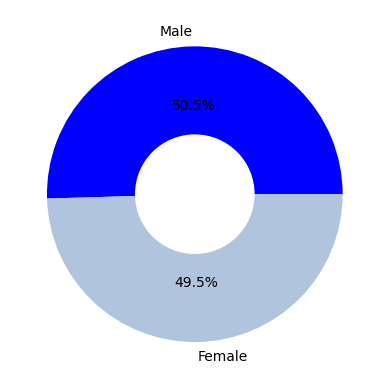

In [47]:
gender_rate = df["gender"].value_counts()

# Create a pieplot
plt.pie(gender_rate.values, labels= gender_rate.index, colors = ["blue", "lightsteelblue"], autopct="%1.1f%%")

# Add a circle at the center to transform it in a donut chart
my_circle = plt.Circle( (0,0), 0.4, color='white')

# gcf: This is a Matplotlib function that stands for "get current figure". The gcf() function is used to get a reference to the current figure being worked on or to create a new figure if none exists. 
p = plt.gcf()

# gca(): Stands for "get current axes." In Matplotlib, the axes are the region of the plot where data is visualized. The gca() function is used to get a reference to the current axes of the current figure.
# add_artist(my_circle): This is a method used on the current axes. my_circle is assumed to be a circular object created earlier, possibly using plt.Circle().
p.gca().add_artist(my_circle)

plt.show()

**Insight:** There is a similar proportion of male and female customers

**3. How does gender affect churn rate? is there a significant difference between males and females churn rate?**

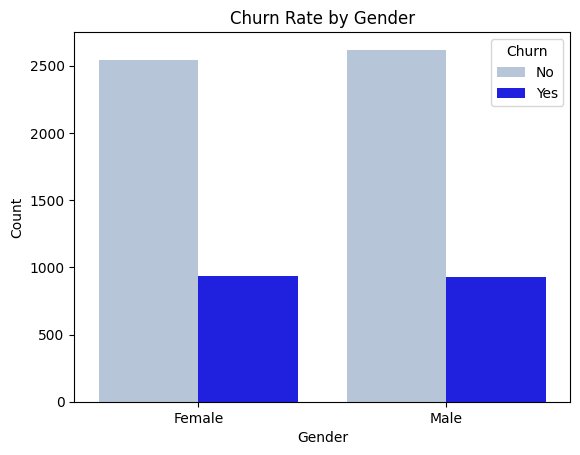

In [48]:
sns.countplot(data= df, x = "gender", hue ="Churn",  palette={"lightsteelblue", "blue"})
plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

**Insight**: The ratios are similar, it is evident that there is no particular gender more prone to leaving compared to the other.

**Dose being a senior citizen influence the likelihood of churn?** 

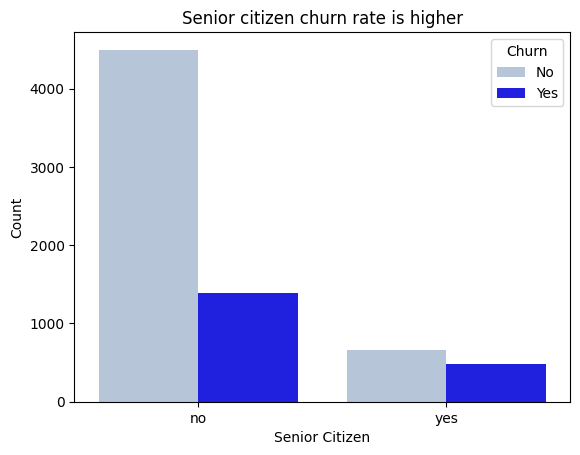

In [82]:
sns.countplot(data= df, x = "SeniorCitizen", hue="Churn",  palette={"lightsteelblue", "blue" })
plt.title("Senior citizen churn rate is higher")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.show()


**Insight:** It can be noticed that even though the ratio of senior citizens among the customers is lower, the likelihood of churn is high for senior citizens compared to non-senior citizens.

**5. How much charges do the custmers mostly pay?**

Text(0.5, 0, 'Total Charges')

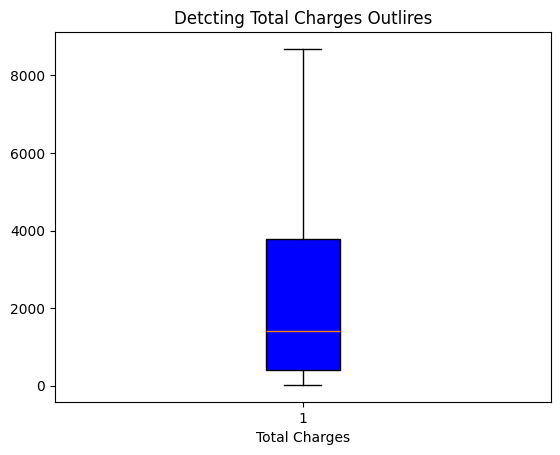

In [50]:
plt.boxplot(df["TotalCharges"], patch_artist=True, boxprops=dict(facecolor='blue'))    
plt.title("Detcting Total Charges Outlires")
plt.xlabel("Total Charges")

There are no outliers in the Total charges column

**6. Describe the distribution of the Total charge column**

In [ ]:
plt.hist(df["TotalCharges"], color="blue")
plt.title("Total Charges Distribution")
plt.xlabel("Total Charges")

**Insight:** The distribution seems skewed, indicating that the majority of our customers pay less than 2000 in charges. As charges increase, the number of customers decreases.

In [52]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**7. Are customers with partners less likely to churn compared to those without parteners?**

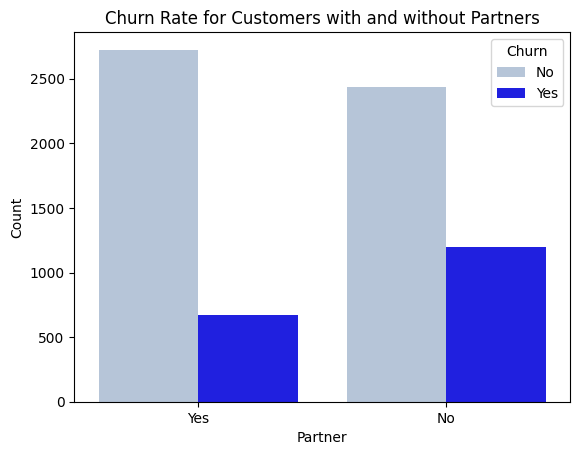

In [83]:
sns.countplot(data =df, x= "Partner", hue= "Churn", palette={"lightsteelblue", "blue"} )
plt.title('Churn Rate for Customers with and without Partners')
plt.xlabel("Partner")
plt.ylabel("Count")
plt.show()

**Insights**
Despite a lower ratio of customers without partners, they exhibit a higher likelihood of churn compared to customers with partners.

In [ ]:
df["Dependents"].unique()

**8. Does having dependents affect the churn rate?**

In [ ]:
# Count the number of occurrences for each combination of values in the "Dependents" and "Churn" columns in your DataFrame. The result is a Series where the index is a combination of "Dependents" and "Churn" values, and the values are the corresponding counts.
df.groupby(["Dependents", "Churn"]).size()

In [ ]:
df.groupby(["Dependents", "Churn"]).size().index

In [ ]:
df.groupby(["Dependents", "Churn"]).size().values

In [58]:
 # The code is creating a new DataFrame (df_grouped) where the rows correspond to unique combinations of "Dependents" and "Churn," and the columns represent the counts of each combination. 
df_grouped = df.groupby(["Dependents", "Churn"]).size().unstack()
df_grouped 

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1773,326


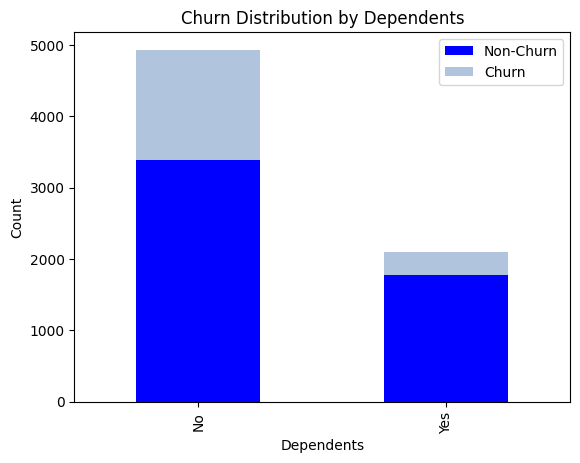

In [100]:
df_grouped = df.groupby(["Dependents", "Churn"]).size().unstack()

df_grouped.plot(kind= "bar", stacked=True, color = ["blue", "lightsteelblue"])

plt.title("Churn Distribution by Dependents")
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.legend(["Non-Churn", "Churn"])

**Insights:** it is noted that most of our customers don't have dependents, and they also more likely to leave compared to customers with dependents

**9. Is there a correleation between tenure and churn rate?**

In [ ]:
df["tenure"].unique()

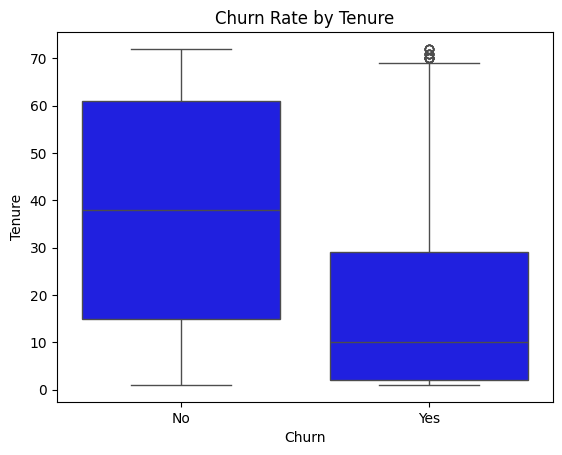

In [64]:
sns.boxplot(data = df, x = "Churn", y  = "tenure", color = "blue") 
plt.title("Churn Rate by Tenure")
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.show()

**Insights**
- it appears that The shorter the duration customers spend with the company  the higher their chances of churning

- the average tenre rate of churned customers is about 10 years


In [ ]:
df["PhoneService"].value_counts()

**10. What is the distribution of customers that have assess to phone services** 

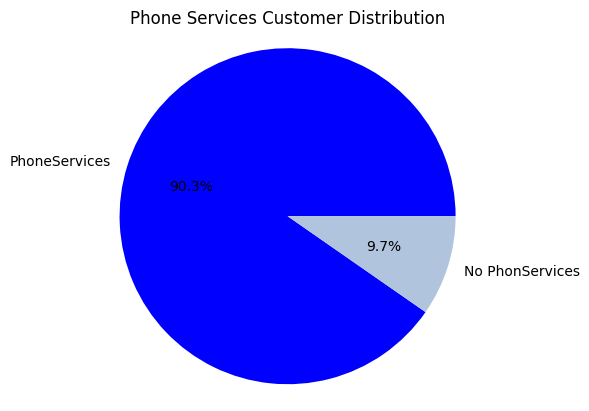

In [106]:
df["PhoneService"].value_counts()
phone_values = df["PhoneService"].value_counts().values
labels = ["PhoneServices", "No PhonServices"]
sizes = [6352, 680]
plt.pie(sizes, labels= labels, colors = ["blue", "lightsteelblue"], autopct="%1.1f%%")
plt.axis("equal")
plt.title("Phone Services Customer Distribution")
plt.show()

**Insights:** Largest portion of the customers have assess to phone services.  

**11. Does the presence or absence of phone service impact churn behavior?**

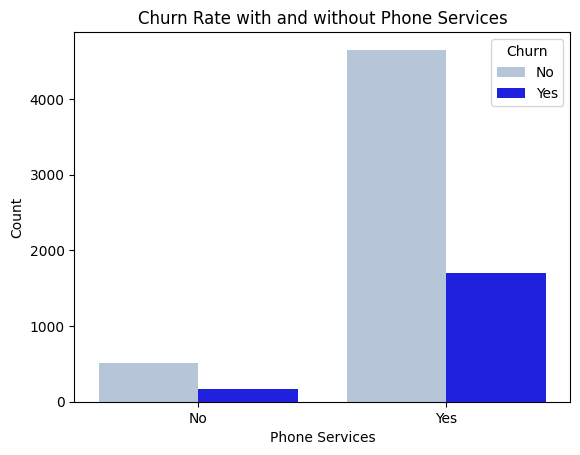

In [104]:
sns.countplot(data= df, x= "PhoneService", hue="Churn",  palette={"lightsteelblue", "blue" })
plt.title("Churn Rate is  Phone Services")
plt.xlabel("Phone Services")
plt.ylabel("Count")
plt.show()


**Insights:**
- The churn rate is not affected by phone services.

**12. How does having multiple lines or not affect the curn rate?**

In [ ]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

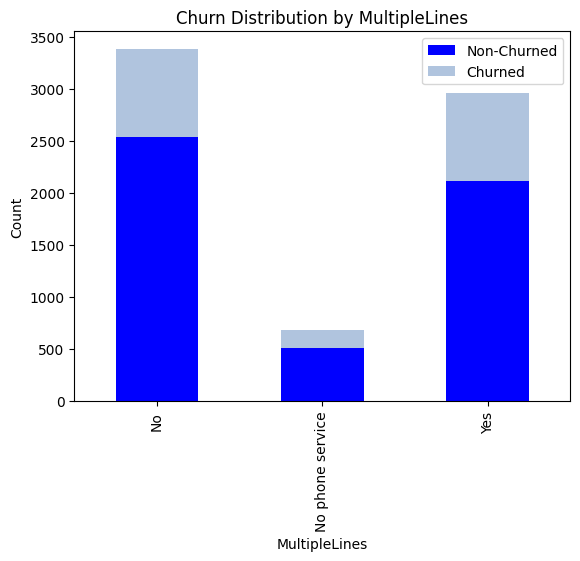

In [108]:
df_grouped = df.groupby(["MultipleLines", "Churn"]).size().unstack()

df_grouped.plot(kind= "bar", stacked=True,  color = ["blue", "lightsteelblue"])
plt.title("Churn Distribution by MultipleLines")
plt.xlabel("MultipleLines")
plt.ylabel("Count")
plt.legend(["Non-Churned", "Churned"])

- The portion of customers who have phone services but without multiple lines is a little higher than those who have multiple lines
- Little proportion of customers who don't have a phone service churn.
- There is no significant diffference in churning rate between customers with Multiple lines and those without multiple lines.

**13. Which internet Service Provider has the highest churn rate?**

In [ ]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

Text(0.5, 1.0, 'Chur Rate by Internet Service')

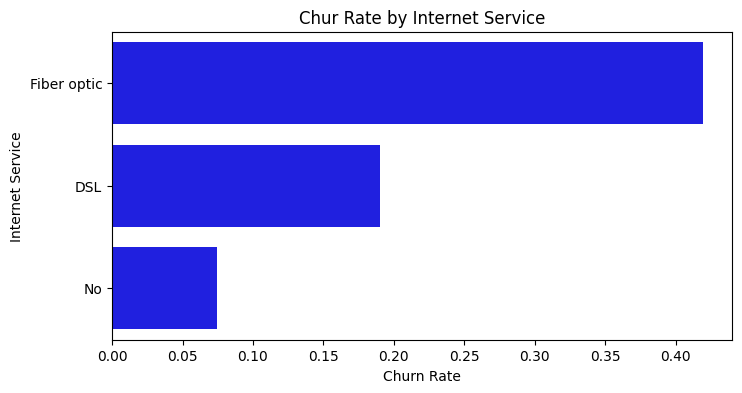

In [110]:
df["Churn_N"] = df["Churn"].map({"Yes":1, "No": 0})
internet_churn = df.groupby("InternetService")["Churn_N"].mean().reset_index()
internet_churn = internet_churn.sort_values("Churn_N", ascending=False)
plt.figure(figsize=(8,4))

sns.barplot(x="Churn_N", y="InternetService", data= internet_churn, color = "blue")
plt.xlabel("Churn Rate")
plt.ylabel("Internet Service")
plt.title("Chur Rate by Internet Service")

**Insight**
Fiber optic has the highest churn rate

**Do customers with online security tend to churn less frequently?**


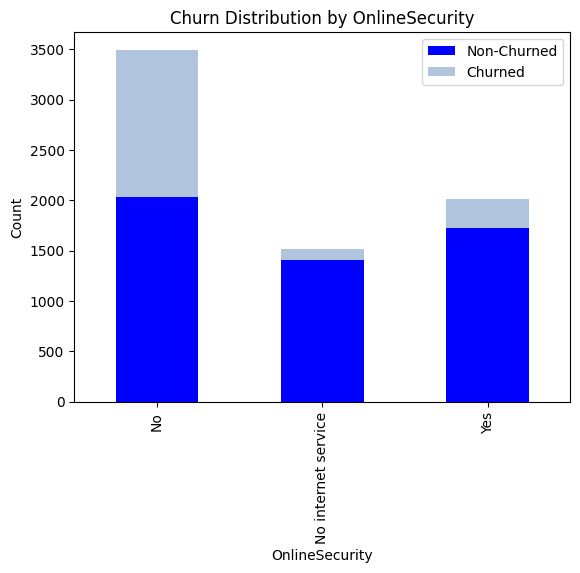

In [111]:
df_grouped = df.groupby(["OnlineSecurity", "Churn"]).size().unstack()
df_grouped.plot(kind= "bar", stacked=True, color = ["blue", "lightsteelblue"])
plt.title("Churn Distribution by OnlineSecurity")
plt.xlabel("OnlineSecurity")
plt.ylabel("Count")
plt.legend(["Non-Churned", "Churned"])

**Insight**
- The larger ratio of the customers don't have Online security service, and it appears that they tend to churn more than the customers with online security.

---------------------

**Summary of features that influence the churn rate:**

Features that influence on the churn rate:
- SeniorCitizen: yes
- Partner: no
- Dependents: no
- tenure: low tunuea
- InternetService: fiber optic
- OnlineSecurity: no



Features that does not influence on the churn rate:
- Gender
- PhoneService
- MultipleLines


